In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
features_desc = pd.read_csv("Features_desc.csv", sep=';', encoding='windows-1251')
features_desc

,№,Наименование поля,Описание поля,Описание значений
0,1,DATA_TYPE,Тип выборки,TRAIN - обучающая выборка\nTEST - тестовая выб...
1,2,POLICY_ID,ID полиса,NaN
2,3,POLICY_BEGIN_MONTH,Месяц начала действия полиса,NaN
3,4,POLICY_END_MONTH,Месяц окончания действия полиса,NaN
4,5,POLICY_IS_RENEWED,Факт пролонгации полиса. Прогнозируемый параметр,Для тестовой выборки параметр обнулён
5,6,POLICY_SALES_CHANNEL,Канал продаж полиса,NaN
6,7,POLICY_SALES_CHANNEL_GROUP,Группа каналов продаж (группировка для колонки...,NaN
7,8,POLICY_BRANCH,Филиал продажи полиса,NaN
8,9,POLICY_MIN_AGE,Минимальный возраст лиц допущенных к управлени...,NaN
9,10,POLICY_MIN_DRIVING_EXPERIENCE,Минимальный стаж вождения лиц допущенных к упр...,NaN


In [3]:
data = pd.read_csv("Ren_data.txt", sep=';')

In [4]:
data.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,TRAIN,1,1,1,1,39,1,Москва,51,12,...,N,1,0,0,0.0,0,0,0.0,Тульская,-1.00
1,TRAIN,2,1,1,1,50,5,Москва,35,7,...,0,1,1,0,0.0,0,4,0.0,Москва,-0.05
2,TRAIN,3,1,1,1,52,6,Москва,41,6,...,1L,0,0,0,0.0,0,1,12518.0,Московская,-0.07
3,TRAIN,4,1,1,1,50,5,Москва,36,12,...,0,1,1,0,0.0,0,6,15000.0,Москва,0.05
4,TRAIN,5,1,1,0,52,6,Санкт-Петербург,42,5,...,N,0,0,0,0.0,0,0,50000.0,Ленинградская,0.17


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96605 entries, 0 to 96604
Data columns (total 30 columns):
DATA_TYPE                        96605 non-null object
POLICY_ID                        96605 non-null int64
POLICY_BEGIN_MONTH               96605 non-null int64
POLICY_END_MONTH                 96605 non-null int64
POLICY_IS_RENEWED                96605 non-null int64
POLICY_SALES_CHANNEL             96605 non-null int64
POLICY_SALES_CHANNEL_GROUP       96605 non-null int64
POLICY_BRANCH                    96605 non-null object
POLICY_MIN_AGE                   96605 non-null int64
POLICY_MIN_DRIVING_EXPERIENCE    96605 non-null int64
VEHICLE_MAKE                     96605 non-null object
VEHICLE_MODEL                    96605 non-null object
VEHICLE_ENGINE_POWER             96605 non-null float64
VEHICLE_IN_CREDIT                96605 non-null int64
VEHICLE_SUM_INSURED              96605 non-null float64
POLICY_INTERMEDIARY              96605 non-null object
INSURER_GENDER    

#### Encode object features

In [6]:
label_encoder = LabelEncoder()
categorical_columns = data.columns[data.dtypes == 'object']

for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
data.head()

,DATA_TYPE,POLICY_ID,POLICY_BEGIN_MONTH,POLICY_END_MONTH,POLICY_IS_RENEWED,POLICY_SALES_CHANNEL,POLICY_SALES_CHANNEL_GROUP,POLICY_BRANCH,POLICY_MIN_AGE,POLICY_MIN_DRIVING_EXPERIENCE,...,POLICY_PRV_CLM_GLT_N,CLIENT_HAS_DAGO,CLIENT_HAS_OSAGO,POLICY_COURT_SIGN,CLAIM_AVG_ACC_ST_PRD,POLICY_HAS_COMPLAINTS,POLICY_YEARS_RENEWED_N,POLICY_DEDUCT_VALUE,CLIENT_REGISTRATION_REGION,POLICY_PRICE_CHANGE
0,1,1,1,1,1,39,1,0,51,12,...,6,1,0,0,0.0,0,0,0.0,71,-1.00
1,1,2,1,1,1,50,5,0,35,7,...,0,1,1,0,0.0,0,5,0.0,41,-0.05
2,1,3,1,1,1,52,6,0,41,6,...,1,0,0,0,0.0,0,1,12518.0,42,-0.07
3,1,4,1,1,1,50,5,0,36,12,...,0,1,1,0,0.0,0,7,15000.0,41,0.05
4,1,5,1,1,0,52,6,1,42,5,...,6,0,0,0,0.0,0,0,50000.0,36,0.17


#### Drop data_type and policy_id features

In [7]:
train_data = data[data['DATA_TYPE'] == 1].drop(['DATA_TYPE', 'POLICY_ID'], axis=1)
test_data = data[data['DATA_TYPE'] == 0].drop(['DATA_TYPE', 'POLICY_ID'], axis=1)

train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

#### Class balance

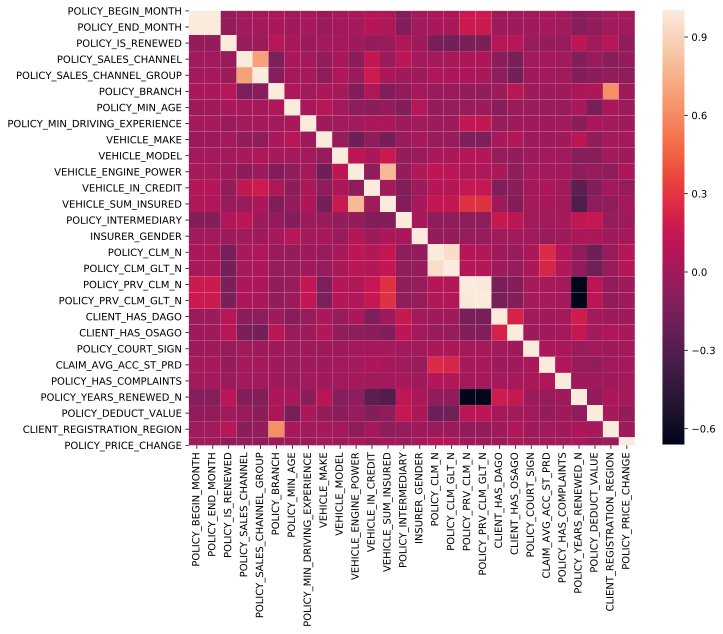

In [8]:
import seaborn as sns
%config InlineBackend.figure_format = 'svg' 
a4_dims = (10, 8)
fig, ax = plt.subplots(figsize=a4_dims)

corr_data = train_data.corr()
sns.heatmap(ax=ax, data=corr_data)

#### Find most correlated features

In [9]:
corr_matrix = train_data.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
corr_f = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

corr_f.head(8)

POLICY_BEGIN_MONTH    POLICY_END_MONTH              0.998021
POLICY_PRV_CLM_N      POLICY_PRV_CLM_GLT_N          0.992033
POLICY_CLM_N          POLICY_CLM_GLT_N              0.938523
VEHICLE_ENGINE_POWER  VEHICLE_SUM_INSURED           0.779410
POLICY_SALES_CHANNEL  POLICY_SALES_CHANNEL_GROUP    0.685215
POLICY_PRV_CLM_GLT_N  POLICY_YEARS_RENEWED_N        0.663761
POLICY_PRV_CLM_N      POLICY_YEARS_RENEWED_N        0.660878
POLICY_BRANCH         CLIENT_REGISTRATION_REGION    0.612091
dtype: float64

In [10]:
corr_features = []
for i in range(4):
    corr_features.append(corr_f.index[i][1]) 

In [11]:
corr_features

['POLICY_END_MONTH',
 'POLICY_PRV_CLM_GLT_N',
 'POLICY_CLM_GLT_N',
 'VEHICLE_SUM_INSURED']

### Drop correlated features

In [12]:
y = train_data['POLICY_IS_RENEWED']
train_data.drop(corr_features + ['POLICY_IS_RENEWED'], axis=1, inplace=True)
test_data.drop(corr_features + ['POLICY_IS_RENEWED'], axis=1, inplace=True)

In [13]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(train_data)
train_data = std_scale.transform(train_data)
test_data = std_scale.transform(test_data)

#### Split dataset to train and validation sets

In [14]:
X, X_valid, y, y_valid = train_test_split(train_data, y, test_size=0.2)

#### Split train set to train/test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### Define methods for fit/predict and metrics calculations

In [16]:
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, accuracy_score
metrics = ['roc_auc_score', 'f1_score', 'recall_score', 'precision_score', 'accuracy_score']

def metrics_calc(predicted_val, y):
    d = {}
    for metric in metrics:
        for predicted in predicted_val:
            d.setdefault(metric, []).append(round(eval(metric)(y, np.argmax(predicted, axis=1)), 3))
    return d

In [17]:
def fit_predict(models_list, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    predicted_values = []
    
    for model in models_list:
        eval(model).fit(X_train, y_train)
        predicted_values.append(eval(model).predict_proba(X_test))
        
    return metrics_calc(predicted_values, y_test)

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(200,), alpha=0.001, random_state=42)
gbc = GradientBoostingClassifier(n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42)

In [ ]:
print(fit_predict(['rfc', 'mlp', 'gbc'], X, y))

In [23]:
for model in [rfc, mlp, gbc]:
    model.fit(X_train, y_train)

NameError: name 'mlp' is not defined

In [59]:
from sklearn.metrics import f1_score

rfc_predict = rfc.predict_proba(X_test)
mlp_predict = mlp.predict_proba(X_test)
gbc_predict = gbc.predict_proba(X_test)
averaged_predict = (rfc_predict + mlp_predict + gbc_predict)/3

rfc_score = f1_score(y_test, np.argmax(rfc_predict, axis=1))
mlp_score = f1_score(y_test, np.argmax(mlp_predict, axis=1))
gbc_score = f1_score(y_test, np.argmax(gbc_predict, axis=1))
average = f1_score(y_test, np.argmax(averaged_predict, axis=1))
print(f'Random forest: {rfc_score}, MLP: {mlp_score}, Boosting: {gbc_score}, Avg: {average}')

Random forest: 0.7971472084989415, MLP: 0.7594450885539519, Boosting: 0.7948727848345624, Avg: 0.7938223346363149


#### Model results for validation set

In [49]:
rfc_predict = rfc.predict_proba(X_valid)
mlp_predict = mlp.predict_proba(X_valid)
gbc_predict = gbc.predict_proba(X_valid)
averaged_predict = (rfc_predict + mlp_predict + gbc_predict)/3

rfc_score = f1_score(y_valid, np.argmax(rfc_predict, axis=1))
mlp_score = f1_score(y_valid, np.argmax(mlp_predict, axis=1))
gbc_score = f1_score(y_valid, np.argmax(gbc_predict, axis=1))
average = f1_score(y_valid, np.argmax(averaged_predict, axis=1))
print(f'Random forest: {rfc_score}, MLP: {mlp_score}, Boosting: {gbc_score}, Avg: {average}')

Random forest: 0.7962724650543598, MLP: 0.7596436263951439, Boosting: 0.7968476357267951, Avg: 0.7933686391895004


In [18]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True)

In [19]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, max_depth=10)
logit = LogisticRegression(C=1, solver='liblinear')

cv_scores = cross_val_score(rfc, X_train, y_train, cv=cv, 
                            scoring='f1', n_jobs=1) 

CPU times: user 24.3 s, sys: 0 ns, total: 24.3 s
Wall time: 24.3 s


In [ ]:
print(fit_predict(['logit'], X, y))

In [20]:
cv_scores, cv_scores.mean()

(array([0.80104463, 0.80038008, 0.79384171, 0.79572976, 0.79767405]),
 0.7977340474087883)

/home/jericho/jupyter_projects/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jericho/jupyter_projects/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jericho/jupyter_projects/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/jericho/jupyter_projects/jupyter_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.

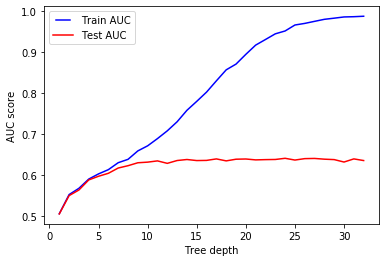

In [74]:
from sklearn.metrics import roc_curve, auc
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = rf.predict(X_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()